In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
os.chdir("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits")

In [2]:
# Define all the files to be compared
root = "GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
wangetal_slitless = fits.open("GRS_FOV0_roll0_dx0_dy0_SCA1_slitless_final.fits")[1].data
phot_seg = fits.open("phot_seg_{0}".format(root))[1].data
mot_seg = fits.open("mot_seg_{0}".format(root))[1].data

In [3]:
# Background subtraction
from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()
bkg = Background2D(wangetal_slitless, (511,511), filter_size=(7,7), bkg_estimator=bkg_estimator)
wangetal_slitless -= bkg.background

In [10]:
min = wangetal_slitless[723:1723, 1624:2624].min()
max = wangetal_slitless[723:1723, 1624:2624].max()
median = np.median(wangetal_slitless[723:1723, 1624:2624])

print(f"min: {min}", f"max: {max}", f"median: {median}", sep='\n')

print(wangetal_slitless.max()/1000)

min: -0.20942932859487617
max: 117.38539732765788
median: 0.021653140258377224
0.11738539732765789


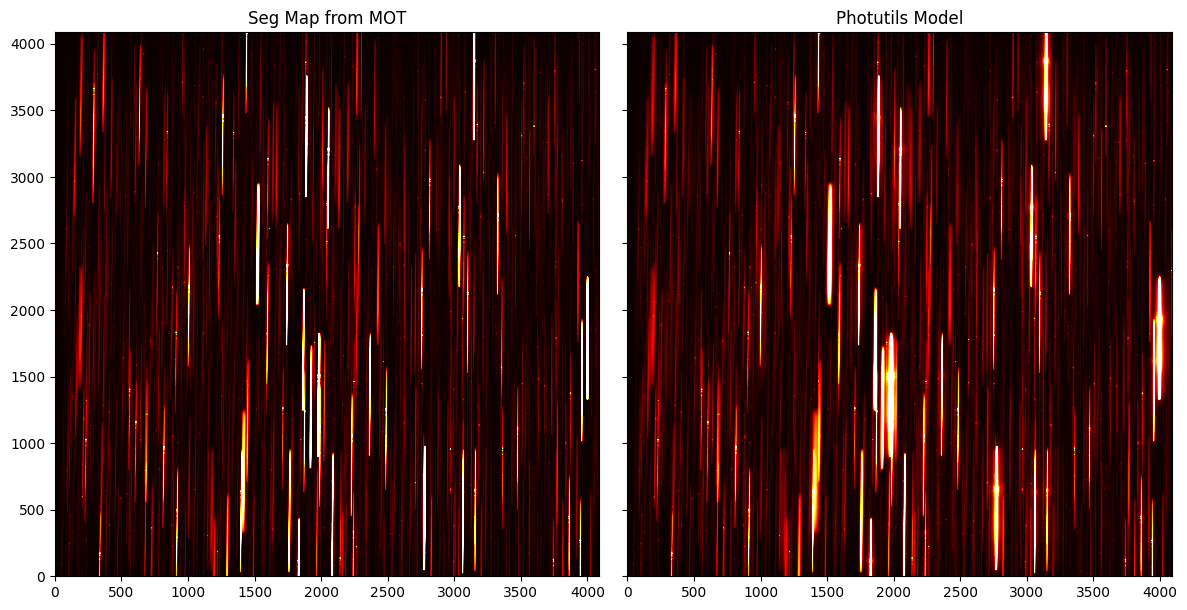

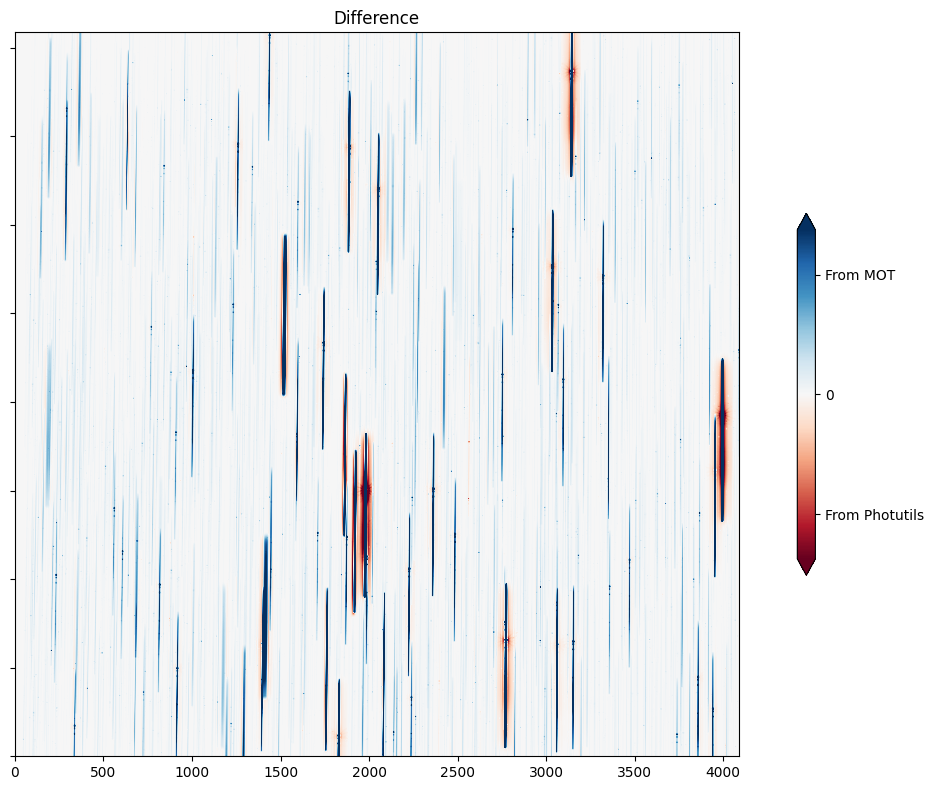

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(mot_seg, origin='lower', cmap='hot', vmin=0, vmax=mot_seg.max()/1000)
ax1.set_title("Seg Map from MOT")

ax2.imshow(phot_seg, origin='lower', cmap='hot', vmin=0, vmax=phot_seg.max()/1000)
ax2.set_title("Photutils Model")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(mot_seg) / np.median(phot_seg)
difference = mot_seg - (phot_seg * scalar)

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, origin='lower', cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([0.25, 0, -0.25], labels=['From MOT', 0, 'From Photutils'])

fig.tight_layout()
plt.show()

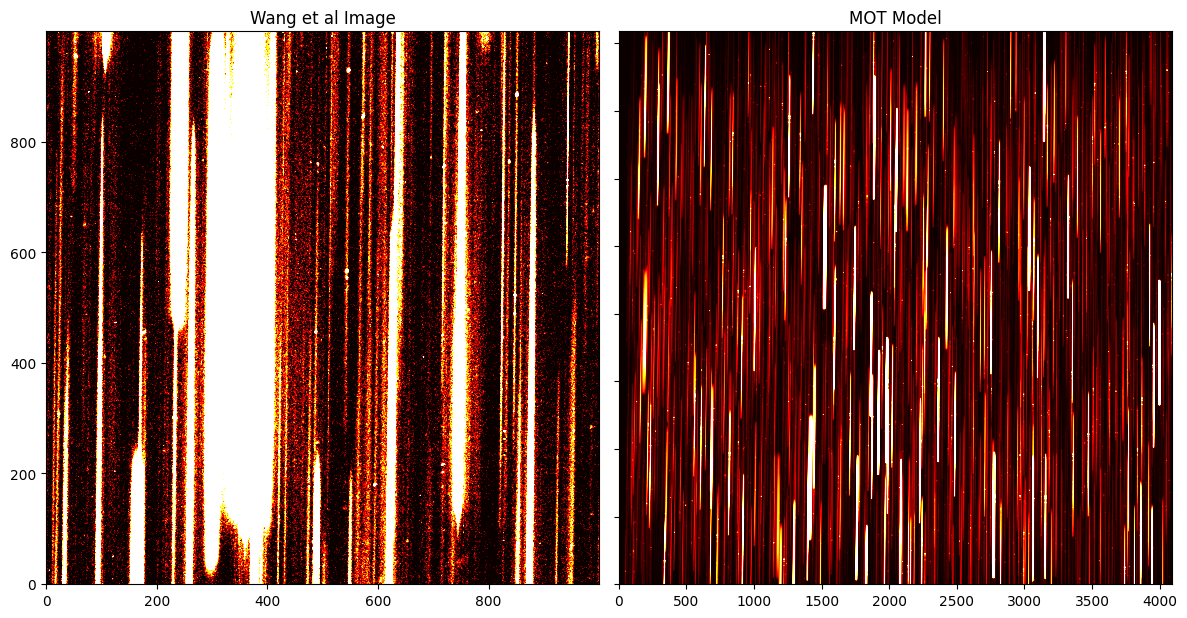

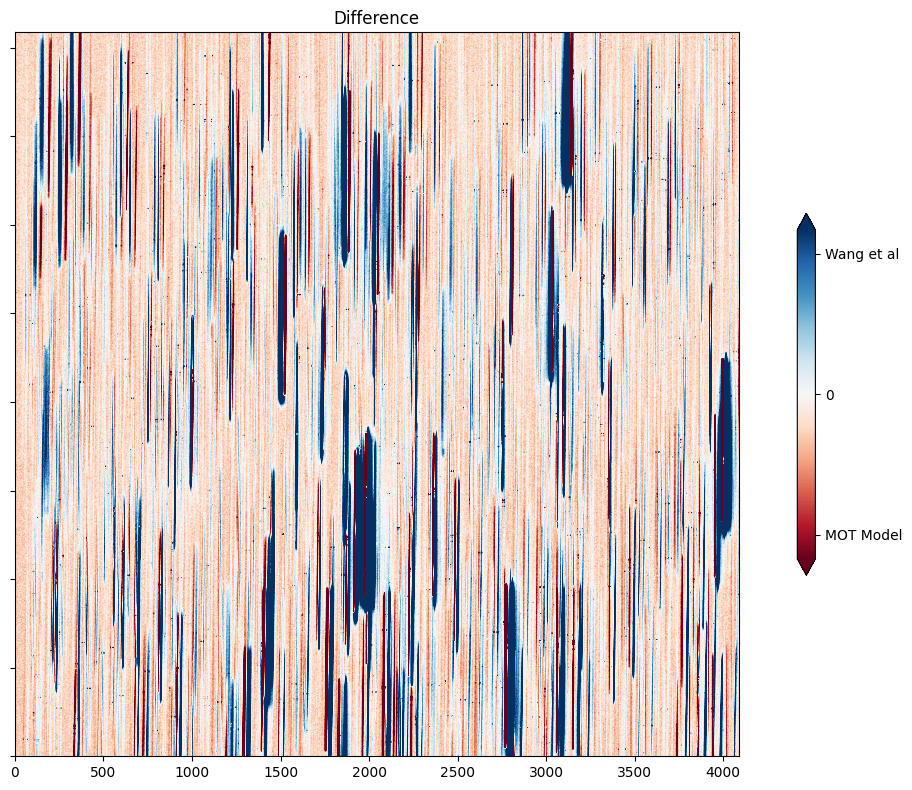

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(wangetal_slitless[723:1723, 1624:2624], origin='lower', cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al Image")

ax2.imshow(mot_seg, origin='lower', cmap='hot', vmin=0, vmax=wangetal_slitless.max()/500)
ax2.set_title("MOT Model")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(wangetal_slitless) / np.median(mot_seg)
difference = wangetal_slitless - (mot_seg * 0.5)

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, origin='lower', cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([0.1, 0, -0.1], labels=['Wang et al', 0, 'MOT Model'])

fig.tight_layout()
plt.show()

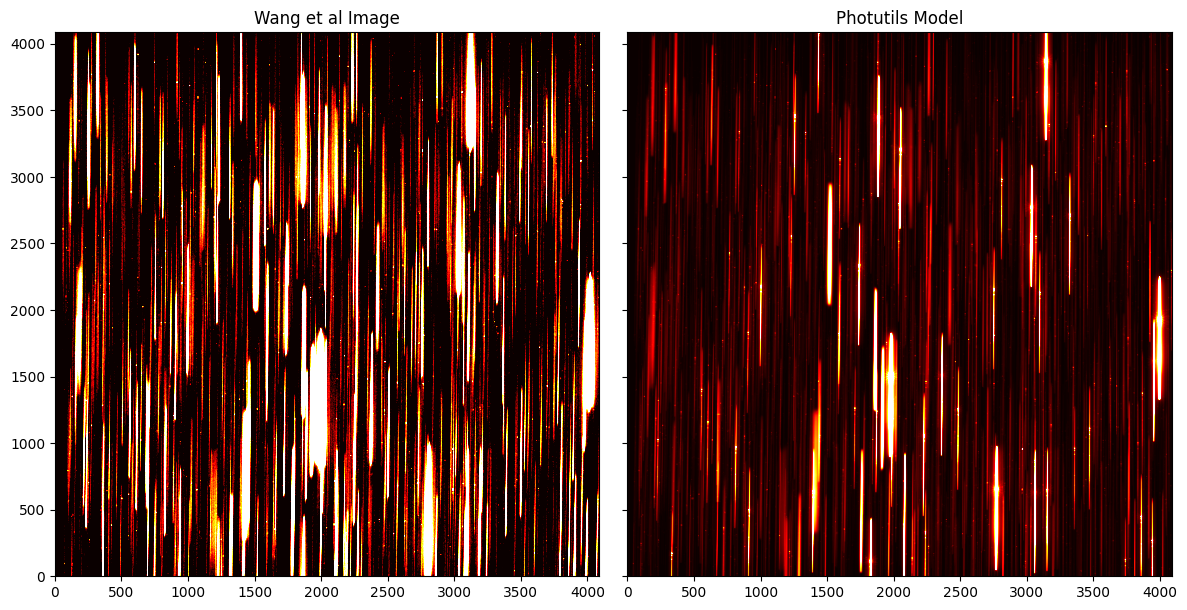

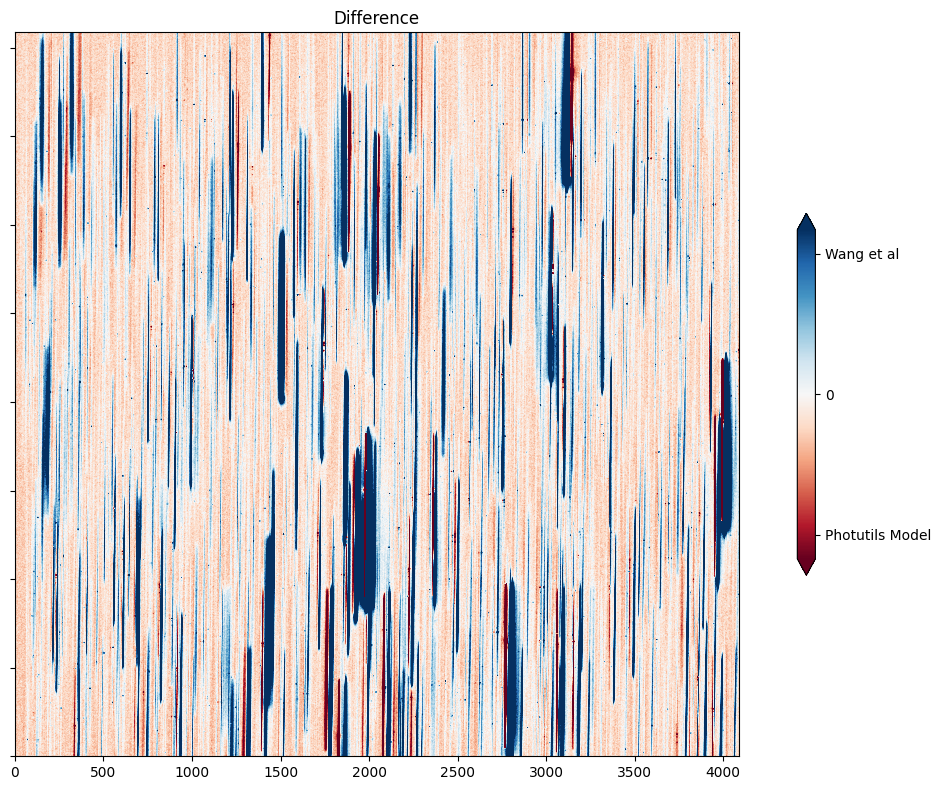

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(wangetal_slitless, origin='lower', cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al Image")

ax2.imshow(phot_seg, origin='lower', cmap='hot', vmin=0, vmax=phot_seg.max()/1000)
ax2.set_title("Photutils Model")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(wangetal_slitless) / np.median(phot_seg)
difference = wangetal_slitless - (phot_seg * scalar)

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, origin='lower', cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([0.1, 0, -0.1], labels=['Wang et al', 0, 'Photutils Model'])

fig.tight_layout()
plt.show()

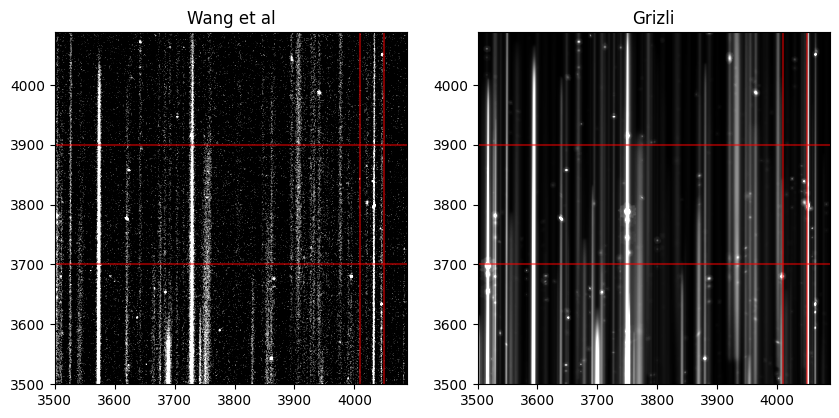

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.imshow(wangetal_slitless, origin='lower', cmap='grey', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al")
ax1.set_xlim(3500, 4088)
ax1.set_ylim(3500,4088)

ax1.axvline(4010, c='r', alpha=0.5)
ax1.axvline(4050, c='r', alpha=0.5)
ax1.axhline(3700, c='r', alpha=0.5)
ax1.axhline(3900, c='r', alpha=0.5)

ax2.imshow(phot_seg, origin='lower', cmap='grey', vmin=0, vmax=wangetal_slitless.max()/1000)
ax2.set_title("Grizli")
ax2.set_xlim(3500, 4088)
ax2.set_ylim(3500,4088)

ax2.axvline(4010, c='r', alpha=0.5)
ax2.axvline(4050, c='r', alpha=0.5)
ax2.axhline(3700, c='r', alpha=0.5)
ax2.axhline(3900, c='r', alpha=0.5)